In [1]:
# 这个库在python中是用来进行画图
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn 

#  pandas是在python中进行处理数据的库
import pandas as pd
import os,sys,time

import tensorflow as tf
# keras有两类keras。我们可以自己进行选择，使用ts-keras还是keras。
# import keras
from tensorflow import keras

# 我们先进行打印一下我们所有的依赖库的版本号
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2021-12-26 20:41:05.639664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-26 20:41:05.639683: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0
sys.version_info(major=3, minor=8, micro=12, releaselevel='final', serial=0)
matplotlib 3.5.1
numpy 1.21.4
pandas 1.3.5
sklearn 1.0.1
tensorflow 2.7.0
keras.api._v2.keras 2.7.0


In [2]:

# 我们使用keras来搭建一个分类模型.我们学习使用分类模型的，
# 我们可以kera内置的数据集。导入数据集fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
# 我们从这个kera内置的数据集fashion_mnist拆分出训练集和测试集
# python中通过变量
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
# 一般情况下，我们需要将训练集拆分成训练集和验证集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

# 我们依次打印训练集、验证集、测试集的数据
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# 我们在所有的是训练集、验证集、测试集的数据，再增加一个归一化的数据
# 
print("数据归一化之前:",np.max(x_train),np.min(x_train))

# x = (x - u) / std
# 上面是归一化的逻辑。上面 x 减去均值 除以方差。就得到了归一化的目的。
# 下面是实现方法：
# 我们从sklearn执行器里面导入StandardScaler
from sklearn.preprocessing import StandardScaler
# 进行StandardScaler(标准缩放器)的实例化
scaler = StandardScaler()
# x_train:[None,28,28] -> [None,784]
# 
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

print("数据归一化之后:",np.max(x_train_scaled), np.min(x_train_scaled))

# TODO 为什么做数据归一化之后。模型的效果会好很多？？

数据归一化之前: 255 0
数据归一化之后: 2.0231433 -0.8105136


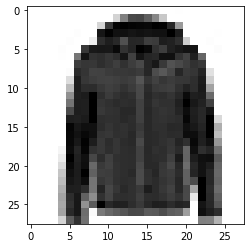

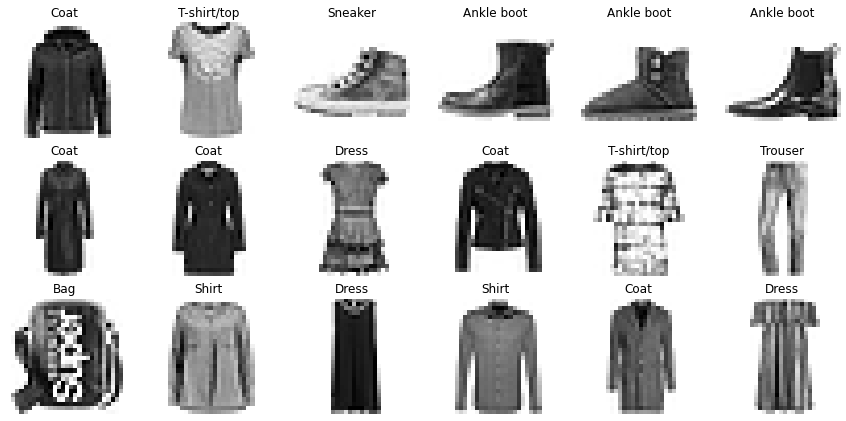

In [4]:
def show_single_image(img_array):
    plt.imshow(img_array,cmap="binary")
    plt.show()

    
show_single_image(x_train[0])

# 这个我们是从Tensorflow官网上面找到的。这个fashion_mnist数据集中各个图像对应的类别
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_all_images(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    # 这里是需要断言，我们打印的数据数量不能大约原始数据集的数量
    assert n_rows * n_cols < len(x_data)
    # 配置我们需要显示的图片的size 我们是将
    plt.figure(figsize = (n_rows*5,n_cols *1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            # 行列的数据转化为我们数据集中的index索引值
            index = n_cols * row + col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation = 'nearest')
            plt.axis('off')
            # y_data数据集合中存储的是x_data里面图像的对应的名称
            plt.title(class_names[y_data[index]])
    plt.show()
# 我们按照三行五列的打印形式打印出这个数据集合    
show_all_images(3,6,x_train,y_train,class_names)            

In [6]:
# 下面，我们就可以进行构建我们的分类深度神经网络模型模型（DNN-Model）
# 我们使用tf.keras.models.Sequential(). 我们可以看到一下他的API

# https://tensorflow.google.cn/tutorials/keras/classification
# Sequential 将层的线性堆栈分组到 tf.keras.Model 中。继承自：模型、层、模块

# 模型添加层的第一种方法
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 添加20层的深度神经网络模型
for _ in range(20):
    
    model.add(keras.layers.Dense(100,activation="relu"))
    model.add(keras.layers.BatchNormalization())
    #   这个另外一种批归一化的实现方法。将批归一化放在激活函数之前
    """
    model.add(keras.layers.Dense(100)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu')
    
    """
keras.layers.Dense(10,activation='softmax')


# # 模型添加层的第二种方法
# model = keras.models.Sequential([
#     # 往模型对象里面添加层次。这一层是往模型里面添加输入28*28的图像  Flatten是展平为一维向量
#     keras.layers.Flatten(input_shape=[28, 28]),
#     # activation是激活函数
#     # 全连接层就是神经网络中最普通的神经网络，下一层和上一层进行全连接
#     keras.layers.Dense(300, activation='relu'),
#     # 和上面一层进行全连接
#     keras.layers.Dense(100, activation='relu'),
#     # 这一层我们让他输出为长度为10的向量。因为我们的衣服种类就是十种
#     keras.layers.Dense(10,activation='softmax')
# ])

# 激活函数： 
#  relu: y=max(0,x) 输出x和0中最大的数字
# softmax 这个函数做的事情就是将向量编程概率分布。
#  具体的做法就是：x=[x1,x2,x3]
#  y=[e^x1/sum,e^x2/sum,e^x3/sum] sum = e^x1 + e^x2 + e^x3

#  loss 损失函数 sparse_categorical_crossentropy 就是交叉熵损失函数
# y是一个index的值  y->index y->one_hot ->
# optimizer="sgd" 模型的求解函数
# metrics = ["accuracy"] 把损失函数
model.compile(loss="sparse_categorical_crossentropy",
              optimizer ="sgd",
              metrics = ["accuracy"])


In [7]:
model.layers

In [8]:
model.summary()
# model.summary()是一个含很有用的函数。他可以打印出这个模型的概况。
# 他可以告诉我们模型中一共有多少个参数，有哪些参数是可以训练的。

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_20 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_21 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 100)              

In [9]:
# 下面我们学习一下Tensorflow2.0的Keras中callback回调。
# 下面我们学习一下他的使用：Tensorboard,earlystoping、ModelCheckpoint
#  定义一个日志的文件夹
logdir = './dnn-callbacks'

if not os.path.exists(logdir):
    os.mkdir(logdir)
# 输出的模型文件.输出的模型的文件的。    
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

# Tensorboard. 实例化对象传入的是一个日志文件夹

# ModelCheckpoint 实例化对象需要传入两个参数，output_model_file输出的模型文件地址      
# save_best_only = True保存最好的模型文件。如果不设置，默认会保存最近的那个模型文件。

# EarlyStopping
# 三个重要的参数：
# monitor表示：我要关注的哪一个质量指标
# min_delta 是设置的一个最小的阈值。这个阈值表示这次训练和上次训练的最小的差距。
# patience: (耐心) 联系多少次的差距都比min_delta的阈值要小的话，就可以提前关闭。

# 比如：我们下面设置的训练1000次。但是如果连续十次.训练的accuracy值都比min_delta=1e-3要小，那么我们就可以提前训练。
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only = True),
    keras.callbacks.EarlyStopping(patience=10,min_delta=1e-3)
]

In [10]:
# 我们可以开始进行训练模型了
# 下面的方法就是我们把训练集放到这个模型里面。并且epochs = 10我们进行训练10次
# 同时我们加入了验证数据集。validation_data=(x_valid,y_valid)这样每隔一段时间他就是进行验证。
# 这个训练方法是可以返回一个值的
history=model.fit(x_train_scaled,y_train,
                  epochs = 1000,
                  validation_data=(x_valid_scaled,y_valid),
                  callbacks =callbacks )


# 参数众多  训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f（g(x)）

Epoch 1/1000
1719/1719 [==============================] - 8s 4ms/step - loss: 4.3905 - accuracy: 0.1192 - val_loss: 2.4160 - val_accuracy: 0.1130
Epoch 2/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.2820 - accuracy: 0.1088 - val_loss: 2.1705 - val_accuracy: 0.1122
Epoch 3/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.1509 - accuracy: 0.1073 - val_loss: 2.1427 - val_accuracy: 0.1022
Epoch 4/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.1213 - accuracy: 0.1063 - val_loss: 2.0011 - val_accuracy: 0.1006
Epoch 5/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.2304 - accuracy: 0.1018 - val_loss: 2.0336 - val_accuracy: 0.0948
Epoch 6/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.2052 - accuracy: 0.1029 - val_loss: 2.2380 - val_accuracy: 0.0974
Epoch 7/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.1959 - accuracy: 0.0983 - val_loss: 2.1059 -

In [ ]:
# History其实就是keras的一个callback的值
type(history)

In [ ]:
history.history

In [ ]:
# 我们可以把上面的histoty按照图标的形式打印出来
def plot_learning_curves(history):
    # plot_learning_curves是pandas里面一个很重要的数据结构
    pd.DataFrame(history.history).plot(figsize=(8,5))
    # 显示成网格的形式
    plt.grid(True)
    # 我们设计数据的范围
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)    

In [ ]:
# 我们在测试集合上来进行测试一下我们的模型。
model.evaluate(x_test_scaled,y_test)